In [14]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
dNde = lambda en, norm, gamma, line, line_energy, sigma: \
    norm * en**(-gamma) + line / np.sqrt(2*np.pi) / sigma * np.exp(-1 / 2 * (en-line_energy)**2 / sigma**2)

pl = lambda en, norm, gamma: norm * en**(-gamma)

In [3]:
model_norm = 1000
model_gamma = 2.1
model_line = 100
model_line_energy = 5
model_sigma = 0.5

model = lambda x_: dNde(x_, model_norm, model_gamma, model_line, model_line_energy, model_sigma)

x = np.linspace(0.1, 10)

y = model(x)

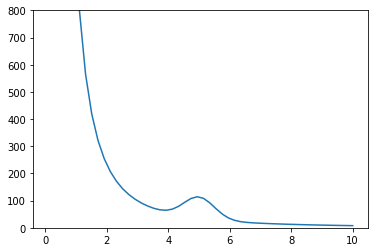

In [4]:
plt.plot(x, y)
plt.ylim(0, 800)
plt.show()

In [5]:
num_bin = 40
x_lower = 0.5
x_upper = 10
delta = (x_upper-x_lower) / num_bin
sim_spectrum = []
plot_spectrum = []

for i in range(1, num_bin+1):
    
    x = x_lower + delta * (i - 0.5)
    x_a = x_lower + delta * (i - 1)
    x_b = x_lower + delta * i
    value = quad(model, x_a, x_b)
    sd = np.sqrt(value)
    
    # error_gaussian = np.random.normal(0, sd)
    # sim_value = value + error_gaussian
    
    sim_value = np.random.poisson(value)[0]
    sim_error = np.sqrt(sim_value)
    
    sim_spectrum.append([x, sim_value, sim_error])
    
sim_spectrum = np.array(sim_spectrum)

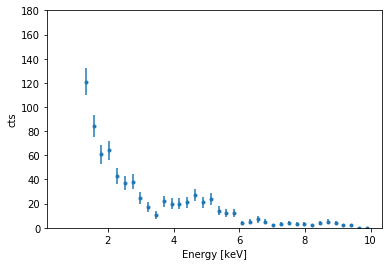

In [6]:
plt.errorbar(sim_spectrum[:, 0], sim_spectrum[:, 1], yerr=sim_spectrum[:, 2], fmt='.')
plt.ylim(0, 180)
plt.xlabel('Energy [keV]')
plt.ylabel('cts')
plt.show()


In [30]:
popt, pcov = curve_fit(pl, sim_spectrum[:, 0], sim_spectrum[:, 1])
perr = np.sqrt(np.diag(pcov))

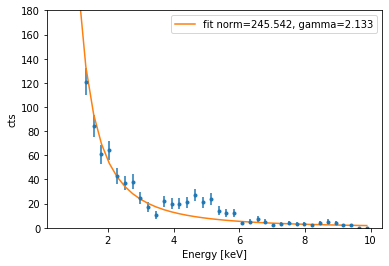

In [32]:
y_model_fit = pl(sim_spectrum[:, 0], *popt)

plt.errorbar(sim_spectrum[:, 0], sim_spectrum[:, 1], yerr=sim_spectrum[:, 2], fmt='.')
plt.plot(sim_spectrum[:, 0], y_model_fit, label=f'fit norm={popt[0]:.3f}, gamma={popt[1]:.3f}')
plt.ylim(0, 180)
plt.xlabel('Energy [keV]')
plt.ylabel('cts')
plt.legend()
plt.show()

In [35]:
range_factor = 5
norm_lower = popt[0] - range_factor * perr[0]
norm_upper = popt[0] + range_factor * perr[0]
gamma_lower = popt[1] - range_factor * perr[1]
gamma_upper = popt[1] + range_factor * perr[1]
num_bin = 100

fit_residuals = np.abs(sim_spectrum[:, 1] - y_model_fit)

res = fit_residuals / sim_spectrum[:, 2]

/home/fangchenli/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [36]:
sim_spectrum[:, 2]


array([26.28687886, 17.8605711 , 14.96662955, 11.        ,  9.16515139,
        7.81024968,  8.        ,  6.55743852,  6.08276253,  6.164414  ,
        5.        ,  4.12310563,  3.31662479,  4.69041576,  4.47213595,
        4.47213595,  4.58257569,  5.19615242,  4.58257569,  4.89897949,
        3.74165739,  3.46410162,  3.46410162,  2.        ,  2.23606798,
        2.64575131,  2.23606798,  1.41421356,  1.73205081,  2.        ,
        1.73205081,  1.73205081,  1.41421356,  2.        ,  2.23606798,
        2.        ,  1.41421356,  1.41421356,  0.        ,  0.        ])